In [1]:
! wget https://www.esrl.noaa.gov/psd/data/correlation/nina34.data

In [4]:
! wget http://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt

--2018-11-25 15:48:36--  http://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.101.63
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.63|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20650 (20K) [text/plain]
Saving to: ‘oni.ascii.txt’

oni.ascii.txt       100%[===================>]  20.17K  --.-KB/s    in 0.03s   

2018-11-25 15:48:36 (751 KB/s) - ‘oni.ascii.txt’ saved [20650/20650]



In [4]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
nina34 = pd.read_csv('oni.ascii.txt',sep='\s+')
nina34=nina34[(nina34.YR>=1982) & (nina34.YR<=2006)]
nina34

,SEAS,YR,TOTAL,ANOM
384,DJF,1982,26.56,-0.05
385,JFM,1982,26.90,0.07
386,FMA,1982,27.35,0.19
387,MAM,1982,27.95,0.47
388,AMJ,1982,28.23,0.66
389,MJJ,1982,28.10,0.72
390,JJA,1982,27.83,0.79
391,JAS,1982,27.81,1.07
392,ASO,1982,28.16,1.58
393,SON,1982,28.50,1.97


In [6]:
nina34=nina34.set_index('YR')
nina34

,SEAS,TOTAL,ANOM
YR,,,
1982,DJF,26.56,-0.05
1982,JFM,26.90,0.07
1982,FMA,27.35,0.19
1982,MAM,27.95,0.47
1982,AMJ,28.23,0.66
1982,MJJ,28.10,0.72
1982,JJA,27.83,0.79
1982,JAS,27.81,1.07
1982,ASO,28.16,1.58


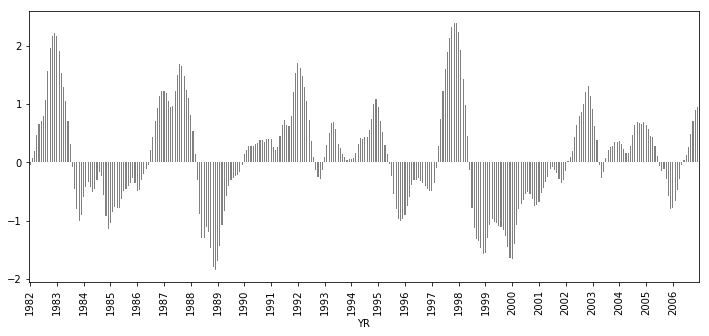

In [7]:
fig,ax=plt.subplots(figsize=(12,5))
nina34.ANOM.plot(kind='bar',ax=ax,color='grey')
ticks = ax.get_xticks()
ax.set_xticklabels(np.arange(1982,2007,1))
ax.set_xticks(ticks[0:-1:12])

In [8]:
ticks[1:-1:5]

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256,
       261, 266, 271, 276, 281, 286, 291, 296])

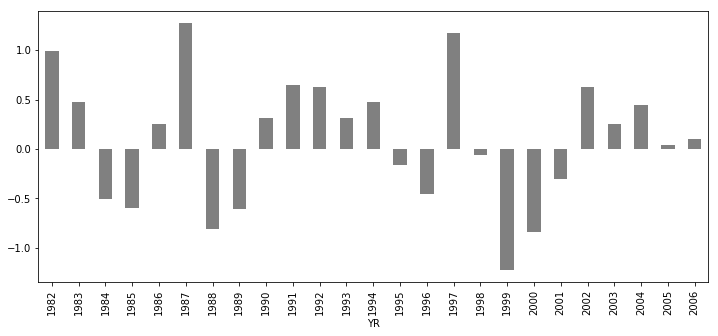

In [9]:
nina34_ANOM_mean = nina34.groupby('YR').ANOM.mean()
nina34_ANOM_mean.plot(kind='bar',color ='grey',figsize=(12,5))

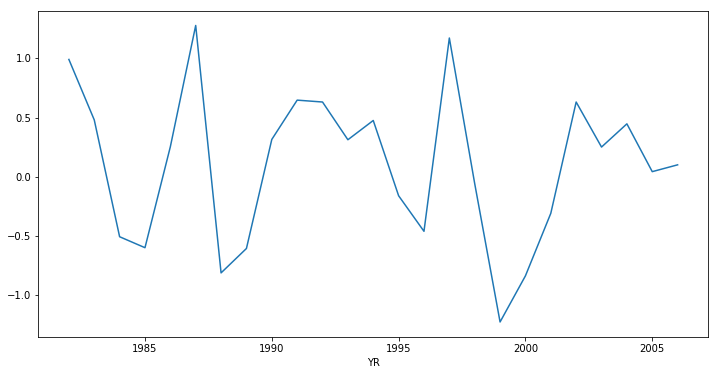

In [10]:
nina34.groupby('YR').ANOM.mean().plot(kind='line',figsize=(12,6))

In [11]:
nd = xr.open_dataset('ndvi_QTP_IRI.nc')

<xarray.DataArray 'ndvi' (T: 600)>
array([0.199752, 0.197006, 0.187039, ..., 0.198791, 0.192973, 0.194378],
      dtype=float32)
Coordinates:
  * T        (T) datetime64[ns] 1982-01-08T12:00:00 1982-01-24 ...

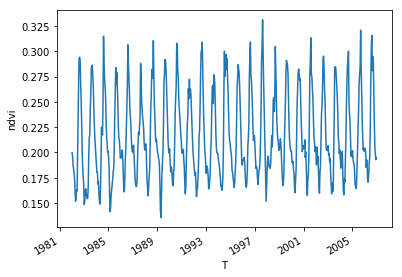

In [12]:
nd_mean = nd.mean(dim=['X','Y'])
nd_mean.ndvi.plot()
nd_mean.ndvi

In [13]:
nd_mean.resample(T='1M').mean()

<xarray.Dataset>
Dimensions:  (T: 300)
Coordinates:
  * T        (T) datetime64[ns] 1982-01-31 1982-02-28 1982-03-31 1982-04-30 ...
Data variables:
    ndvi     (T) float64 0.1984 0.1857 0.1774 0.1581 0.1588 0.1773 0.2495 ...

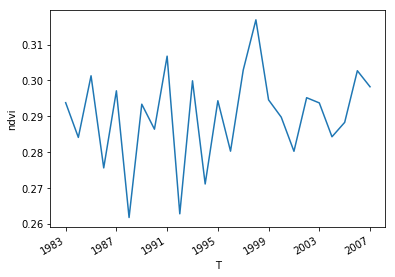

In [15]:
##extract NDVI from May to Sep and calculate the mean
ndvi_mon =nd_mean.resample(T='1M').mean()

M_Sep = (ndvi_mon['T'].dt.month>=5 )& (ndvi_mon['T'].dt.month<=9)
ndvi_mon_MS = ndvi_mon.where(M_Sep)
ndvi_season = ndvi_mon_MS.resample(T='1Y').max()
ndvi_season.ndvi.plot()

In [16]:
from sklearn import linear_model

In [17]:
ndvi_season_pd = ndvi_season.ndvi.to_pandas()
ndvi_season_pd

T
1982-12-31    0.293784
1983-12-31    0.284078
1984-12-31    0.301308
1985-12-31    0.275555
1986-12-31    0.297102
1987-12-31    0.261688
1988-12-31    0.293361
1989-12-31    0.286376
1990-12-31    0.306793
1991-12-31    0.262721
1992-12-31    0.299903
1993-12-31    0.271058
1994-12-31    0.294329
1995-12-31    0.280231
1996-12-31    0.302904
1997-12-31    0.316948
1998-12-31    0.294573
1999-12-31    0.289736
2000-12-31    0.280199
2001-12-31    0.295179
2002-12-31    0.293720
2003-12-31    0.284257
2004-12-31    0.288284
2005-12-31    0.302719
2006-12-31    0.298234
Freq: A-DEC, dtype: float64

In [18]:
nina34_ANOM_pd = pd.DataFrame(nina34_ANOM_mean)
y = ndvi_season_pd
X=nina34_ANOM_pd


In [19]:
from scipy.stats import spearmanr

In [20]:
corr=spearmanr(X,y)
corr

SpearmanrResult(correlation=0.015772264188662354, pvalue=0.940351313006957)

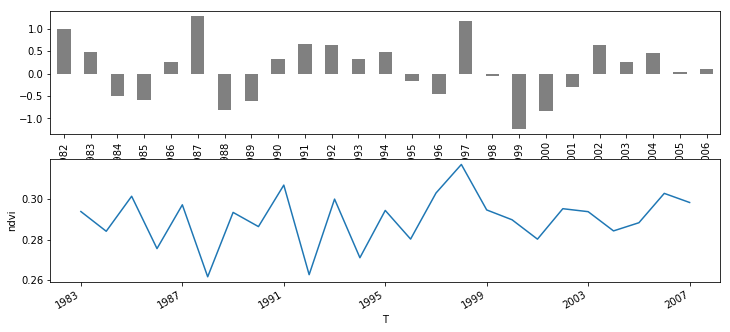

In [21]:
ax1,fig = plt.subplots(nrows=2)
plt.subplot(211)
nina34_ANOM_mean.plot(kind='bar',color ='grey',figsize=(12,5))
plt.subplot(212)
ndvi_season.ndvi.plot()

In [92]:
! pip install -U scikit-learn

In [22]:
import scipy.io as spio

In [62]:
Prcp = spio.loadmat('array_prcp.mat',mat_dtype=True)
Temp = spio.loadmat('array_temp.mat')

temp=xr.DataArray(Temp['array_temp'],dims=['X','Y','T'],coords={'X':np.linspace(73,104,374),'Y':np.linspace(26,39,166)})
prcp = xr.DataArray(Prcp['array_prcp'],dims=['X','Y','T'],coords={'X':np.linspace(73,104,374),'Y':np.linspace(26,39,166)})

temp

<xarray.DataArray (X: 374, Y: 166, T: 408)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * X        (X) float64 73.0 73.08 73.17 73.25 73.33 73.42 73.5 73.58 73.66 ...
  * Y        (Y) float64 26.0 26.08 26.16 26.24 26.32 26.39 26.47 26.55 ...
Dimensions without coordinates: T

In [64]:
ndvi_yr_spatial =nd.resample(T='1Y').mean()
ndvi_yr_spatial

<xarray.Dataset>
Dimensions:  (T: 25, X: 427, Y: 180)
Coordinates:
  * T        (T) datetime64[ns] 1982-12-31 1983-12-31 1984-12-31 1985-12-31 ...
  * Y        (Y) float32 25.986555 26.059282 26.13201 26.204737 26.277464 ...
  * X        (X) float32 72.98613 73.05885 73.131584 73.20431 73.27704 ...
Data variables:
    ndvi     (T, Y, X) float32 0.17304169 0.15933333 0.15416668 0.16845834 ...

In [65]:
temp_intp = temp.interp_like(ndvi_yr_spatial, method='nearest')

TypeError: Cannot compare type 'Timestamp' with type 'int'

In [66]:
nd
nina34_anom=nina34.groupby('YR').ANOM.mean()
